In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt                    
import matplotlib

In [2]:
train = pd.read_csv("train.csv")

test = pd.read_csv("test.csv")

In [3]:
train.shape,test.shape

((1460, 81), (1459, 80))

In [4]:
train.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


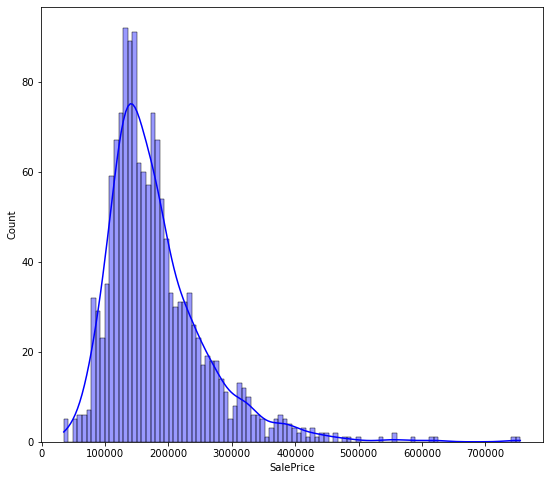

In [6]:
print(train['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.histplot(train['SalePrice'], color='b', bins=100, kde=True, alpha=0.4);

In [7]:
null=train.isnull().sum().sort_values(ascending=False)
null[null>0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [8]:
null = train.isnull().sum()
null_percentage = (null/len(train))*100
null_percentage[null_percentage > 0 ].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [9]:
train['SalePrice'].max()

755000

In [10]:
train['SalePrice'].min()

34900

## Missing Values

In [11]:
total_rows=1460
miss_per=pd.DataFrame(null[null>0])
miss_per.columns=['Missing']
miss_per['Missing%']=((miss_per['Missing']/total_rows)*100).round(2)
miss_per

Missing  Missing%
LotFrontage       259     17.74
Alley            1369     93.77
MasVnrType          8      0.55
MasVnrArea          8      0.55
BsmtQual           37      2.53
BsmtCond           37      2.53
BsmtExposure       38      2.60
BsmtFinType1       37      2.53
BsmtFinType2       38      2.60
Electrical          1      0.07
FireplaceQu       690     47.26
GarageType         81      5.55
GarageYrBlt        81      5.55
GarageFinish       81      5.55
GarageQual         81      5.55
GarageCond         81      5.55
PoolQC           1453     99.52
Fence            1179     80.75
MiscFeature      1406     96.30

In [12]:
# dropping columns which has around 50 percent missing values
train.drop(columns=['LotFrontage'],inplace=True)
test.drop(columns=['LotFrontage'],inplace=True)

In [13]:
numeric_dtypes = ['float64', 'int64']
numeric = []
for i in train.columns:
    if train[i].dtype in numeric_dtypes:
        numeric.append(i)

In [14]:
len(numeric)

37

## Missing values

for values like pool, fireplace, alley we can fill missing values with no means the house doesnt have the feature.

In [15]:
train["PoolQC"] = train["PoolQC"].fillna("NoPool")

train['Alley'] = train['Alley'].fillna("NoAlley")

train['MiscFeature'] = train['MiscFeature'].fillna("Missing")

train['Fence'] = train['Fence'].fillna("NoFence")

train['MasVnrType'] = train['MasVnrType'].fillna("Missing")

train['FireplaceQu'] = train['FireplaceQu'].fillna("NoFireplace")

Electrical:- There is only one value is missing in the Electrical category. From Year Built we found that for all other years 2006 the electrical column had same value.

In [16]:
train[train['Electrical'].isna()]

Id  MSSubClass MSZoning  LotArea Street    Alley LotShape LandContour  \
1379  1380          80       RL     9735   Pave  NoAlley      Reg         Lvl   

     Utilities LotConfig  ... PoolArea  PoolQC    Fence MiscFeature MiscVal  \
1379    AllPub    Inside  ...        0  NoPool  NoFence     Missing       0   

     MoSold  YrSold  SaleType  SaleCondition  SalePrice  
1379      5    2008        WD         Normal     167500  

[1 rows x 80 columns]

In [17]:
train['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [18]:
train[train['YearBuilt'] == 2006]['Electrical'].value_counts()

SBrkr    66
Name: Electrical, dtype: int64

In [19]:
train['Electrical'].fillna('SBrkr',inplace=True)

In [20]:
train['Electrical'].isnull().sum()

0

## Garage Variable 
These GarageYrBlt	, GarageCond, GarageType, GarageFinish, GarageQual	variables have 81 missing values and those are all in the same rows which we see after analysing the data. 
#### For these rows tha value of Garage area and garage cars( area in terms of number of cars) is 0(zero) means these houses have no garage so we fill these values with none.

In [21]:
train['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [22]:
train['GarageType'].fillna('missing',inplace=True)

In [23]:
train['GarageType'].isnull().sum()

0

In [24]:
train['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [25]:
train['GarageCond'].fillna('missing',inplace=True)
train['GarageCond'].isnull().sum()

0

In [26]:
train['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [27]:
train['GarageYrBlt'].fillna(0,inplace=True)
train['GarageYrBlt'].isnull().sum()

0

In [28]:
train['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [29]:
train['GarageFinish'].fillna('missing',inplace=True)
train['GarageFinish'].isnull().sum()

0

In [30]:
train['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [31]:
train['GarageQual'].fillna('missing',inplace=True)
train['GarageQual'].isnull().sum()

0

## Basement Variables
These BsmtFinType2, BsmtExposure, BsmtQual, BsmtCond, BsmtFinType1 variables have 38 missing values and those are all in the same rows which we see after analysing the data. 
#### For these rows tha value of Total Basement Area , BasementType1 Area and BasementType2 Area are all 0(zero) means these houses have no basements so we fill these values with none or zeroes.

In [32]:
train['BsmtFinType2'].fillna('missing',inplace=True)

In [33]:
train['BsmtExposure'].fillna('missing',inplace=True)

In [34]:
train['BsmtFinType1'].fillna('missing',inplace=True)

In [35]:
train['BsmtCond'].fillna('missing',inplace=True)

In [36]:
train['BsmtQual'].fillna('missing',inplace=True)

In [37]:
train.isnull().sum().sort_values(ascending=False)

MasVnrArea     8
Id             0
Electrical     0
GarageYrBlt    0
GarageType     0
              ..
ExterQual      0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 80, dtype: int64

In [38]:
train['MasVnrType'].fillna('None',inplace=True)

In [39]:
train['MasVnrArea'].fillna(0,inplace=True)

In [40]:
train.isnull().sum().sort_values(ascending=False)

Id             0
MSSubClass     0
GarageYrBlt    0
GarageType     0
FireplaceQu    0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 80, dtype: int64

In [41]:
train.isnull().sum().sum()

0

### Categorical and Numerical values

In [42]:
train.drop(columns=['Id'],inplace=True)

In [43]:
df1 = train.drop(columns=['SalePrice'])

In [44]:
numerical_columns = df1.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df1.select_dtypes(include=['object', 'category']).columns

In [45]:
numerical_columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [46]:
categorical_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

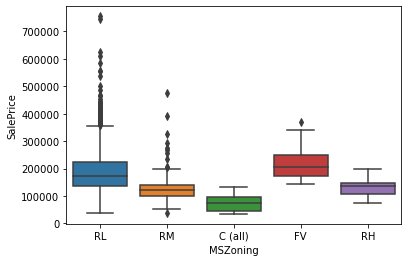

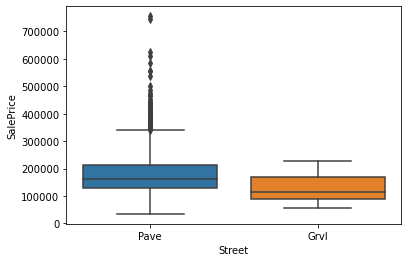

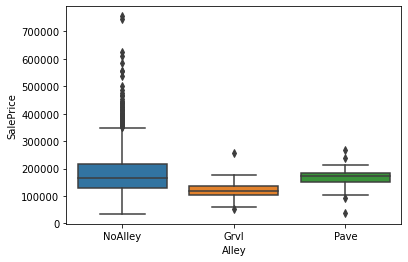

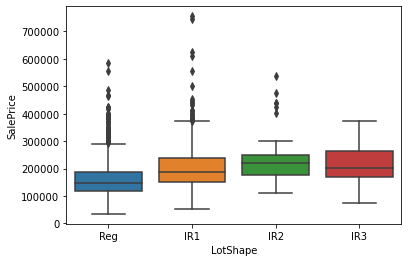

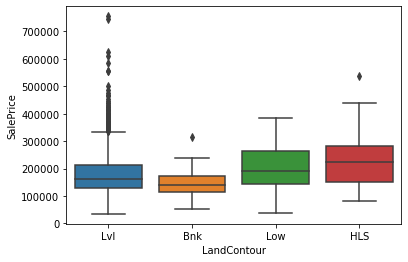

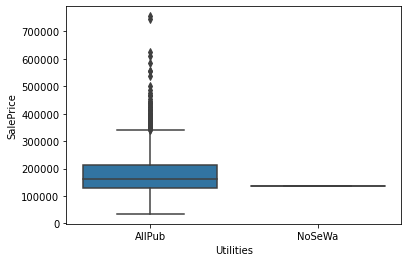

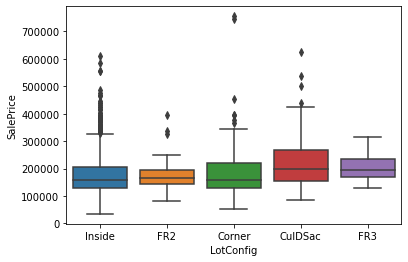

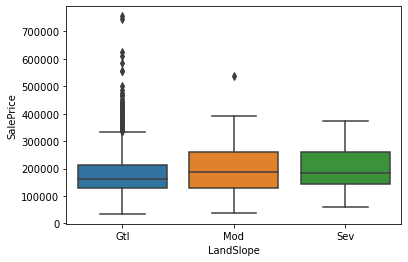

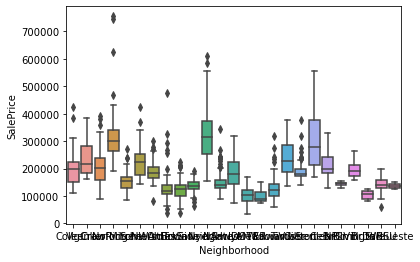

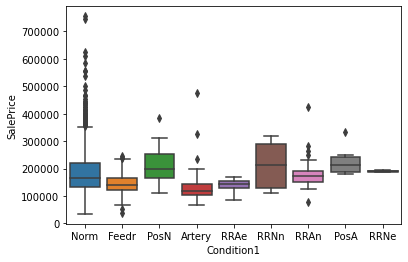

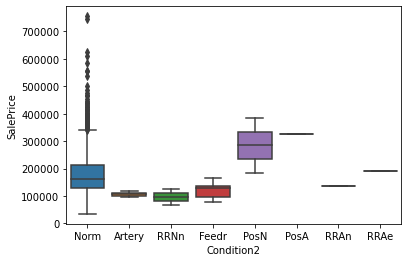

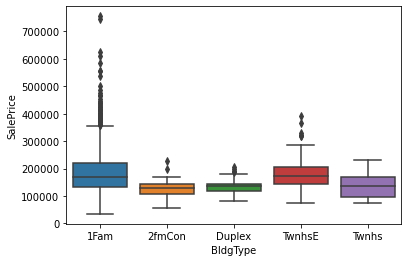

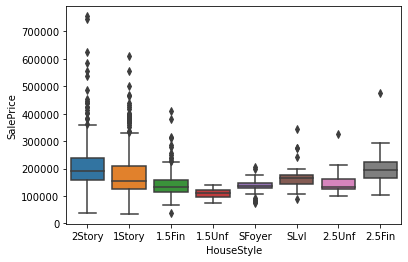

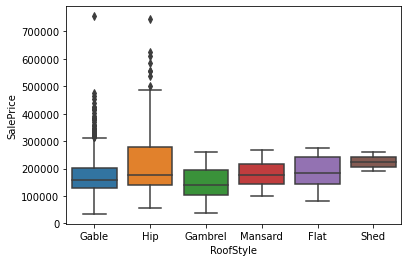

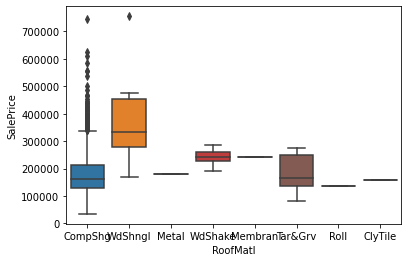

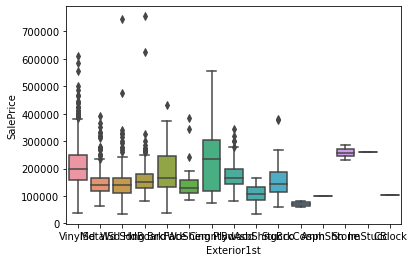

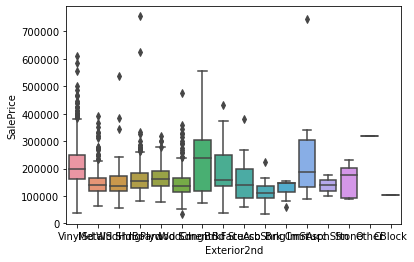

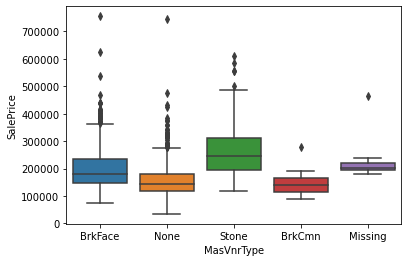

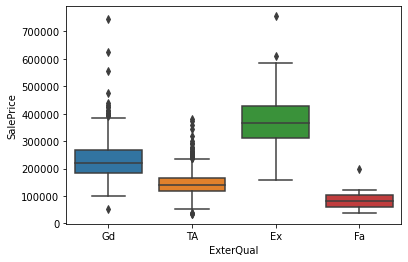

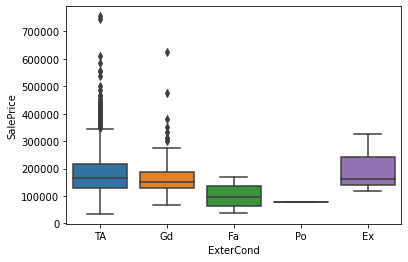

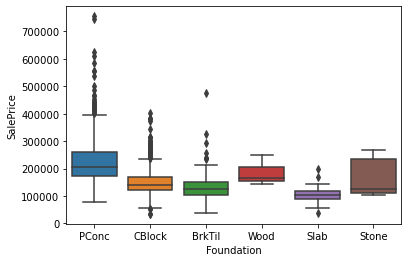

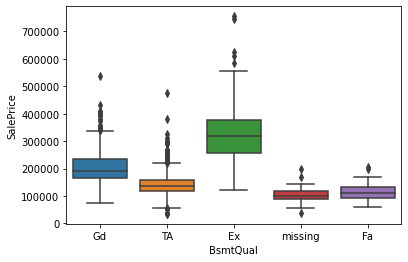

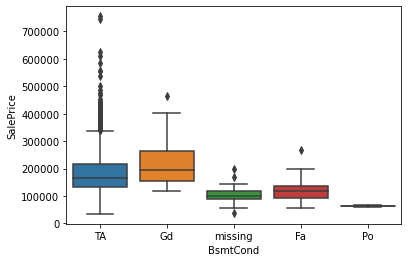

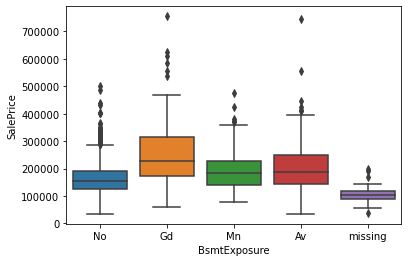

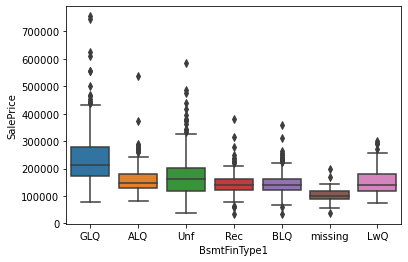

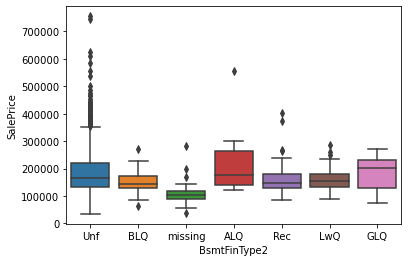

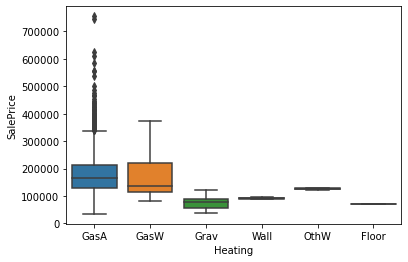

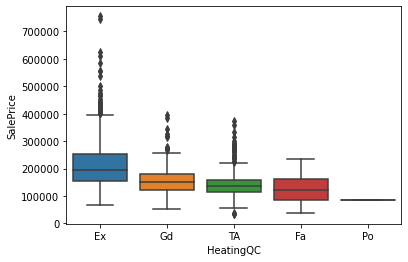

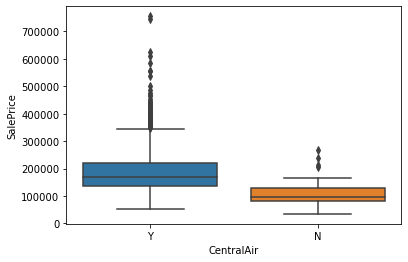

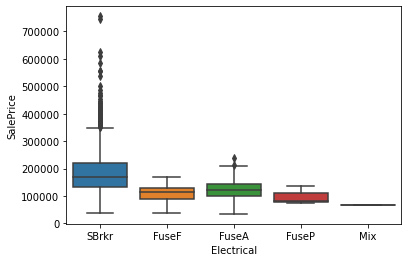

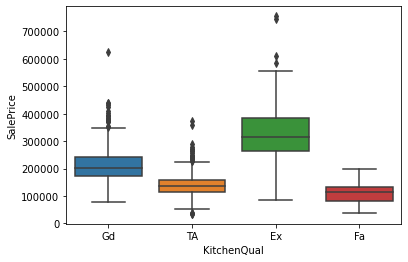

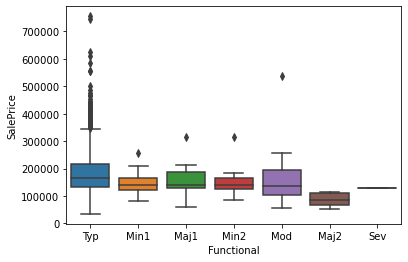

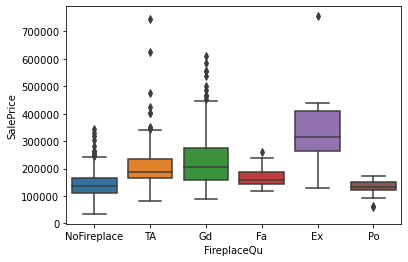

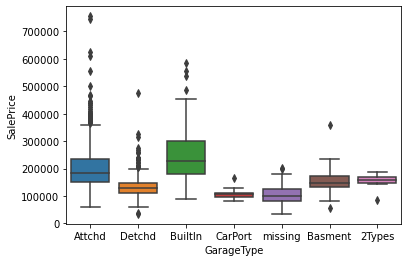

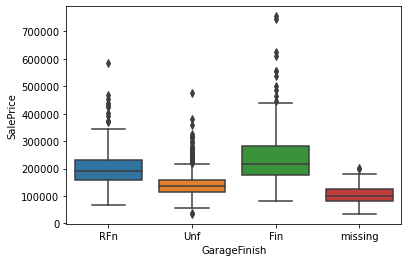

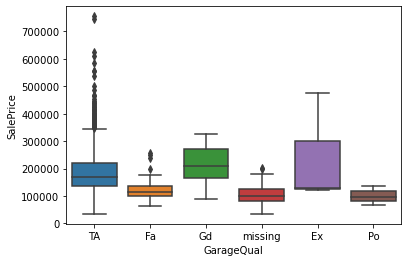

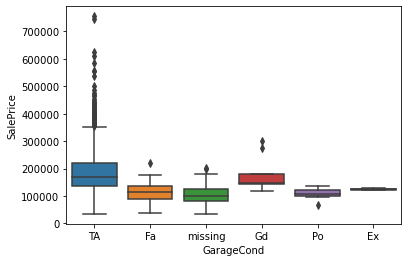

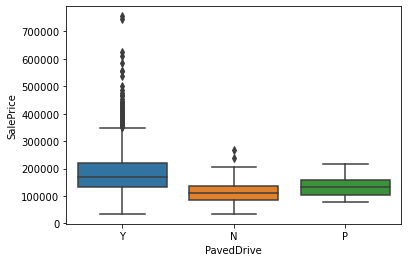

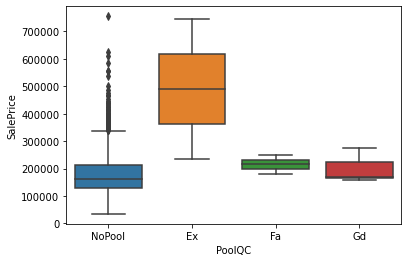

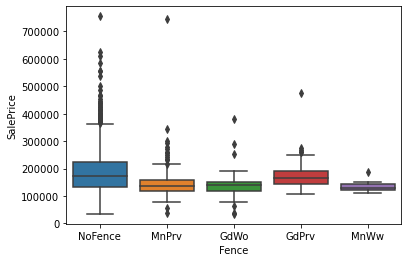

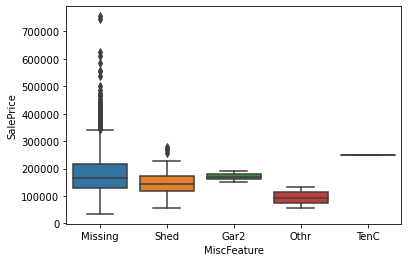

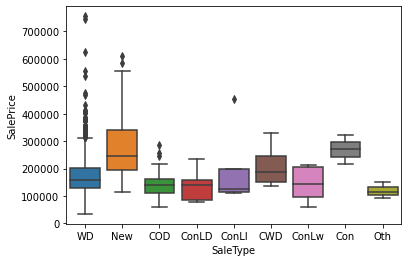

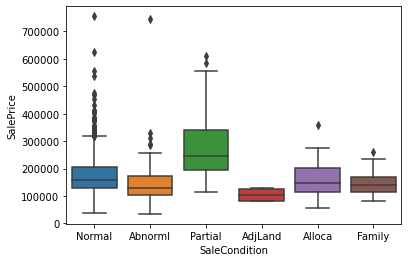

In [47]:
for i in categorical_columns:
    sns.boxplot(data=train , x=i , y='SalePrice')
    plt.show()

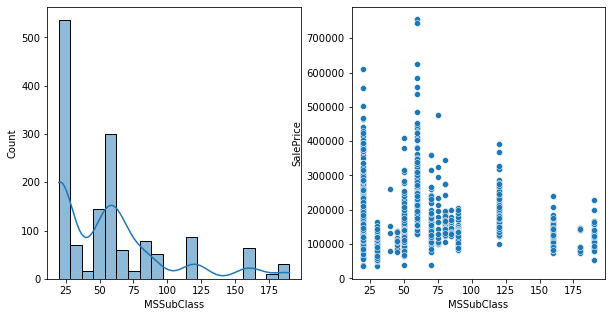

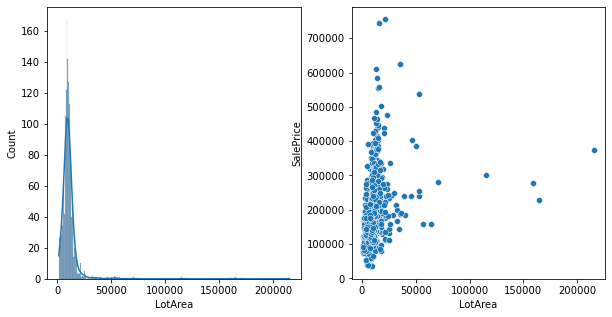

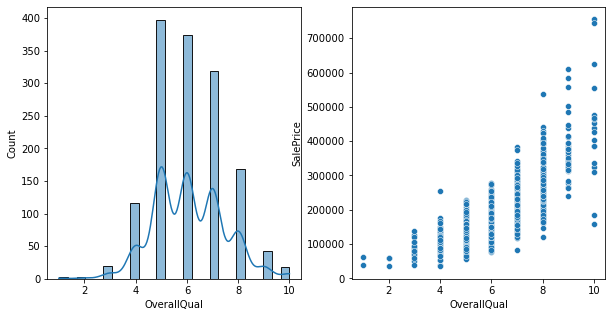

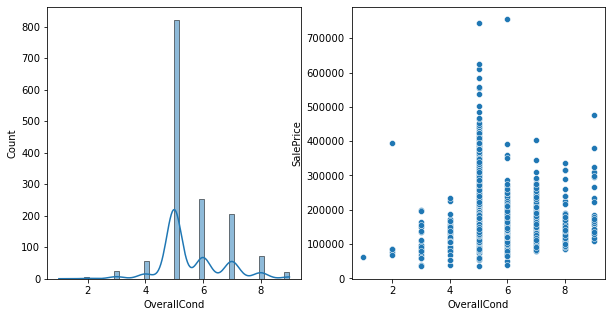

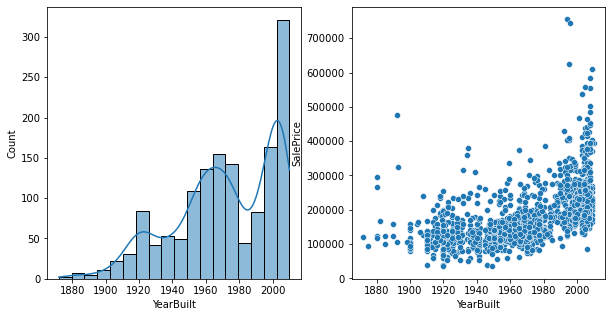

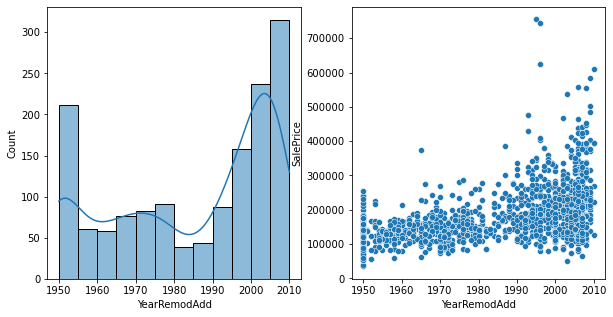

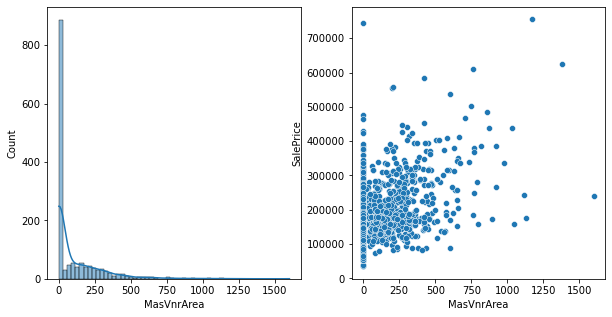

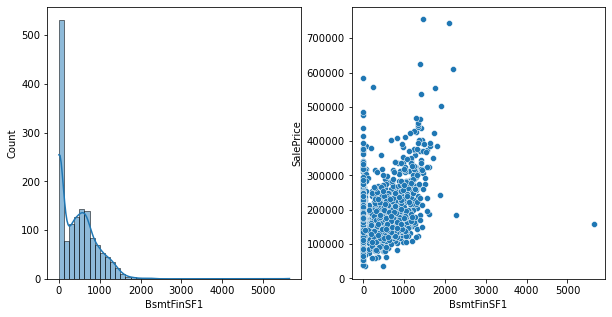

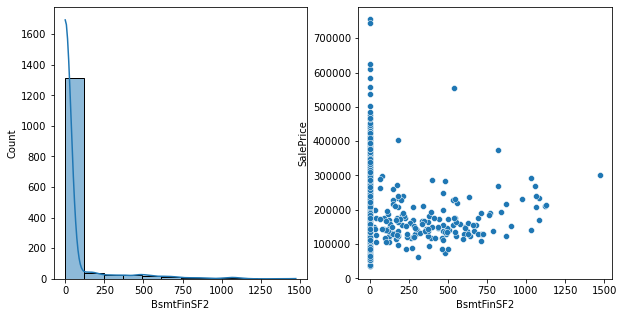

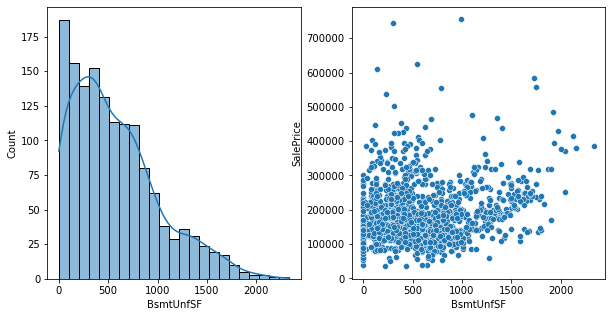

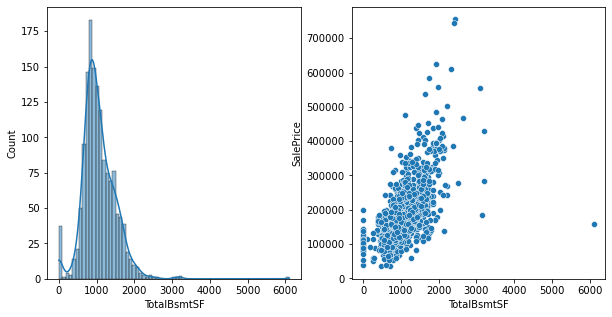

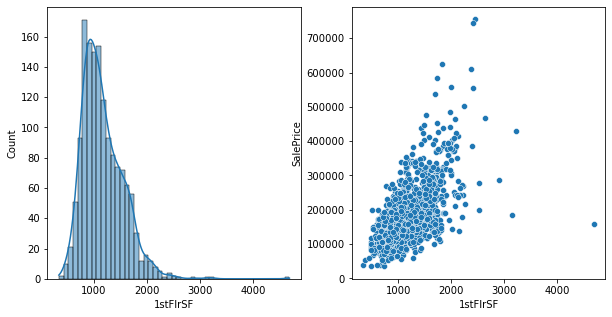

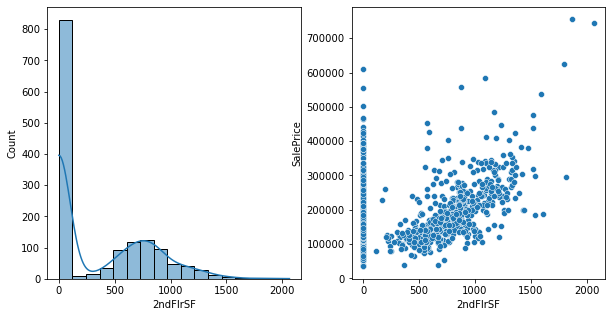

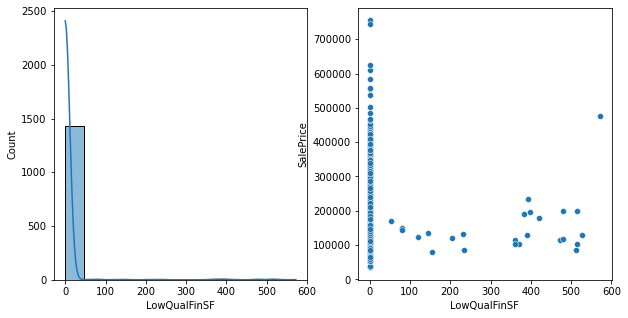

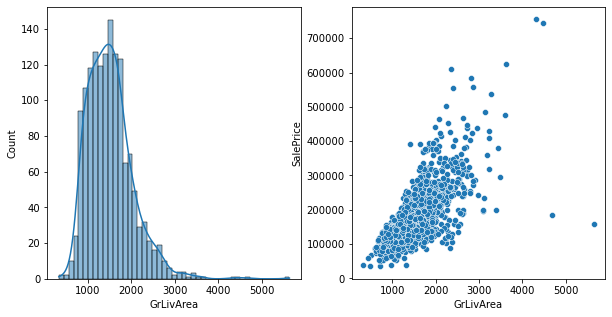

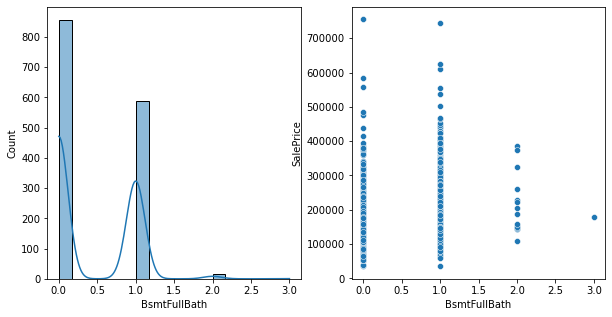

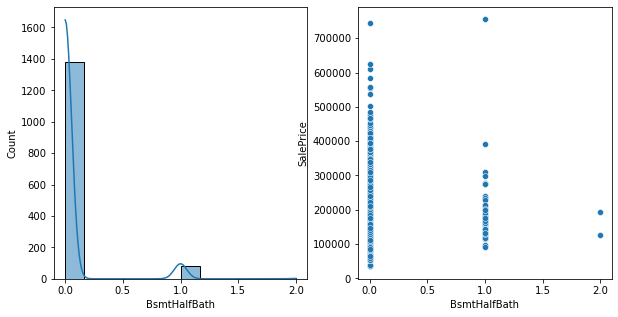

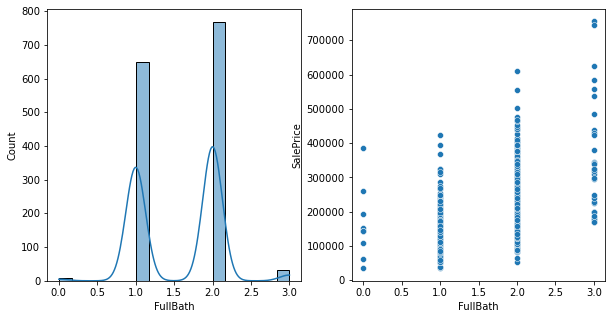

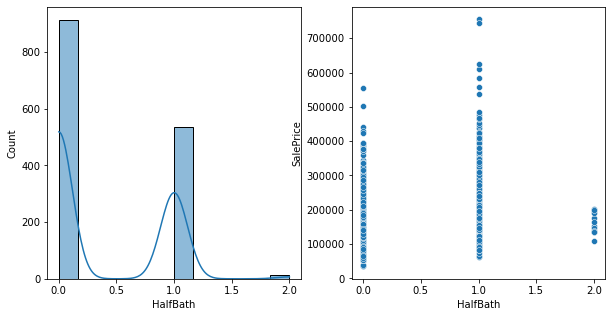

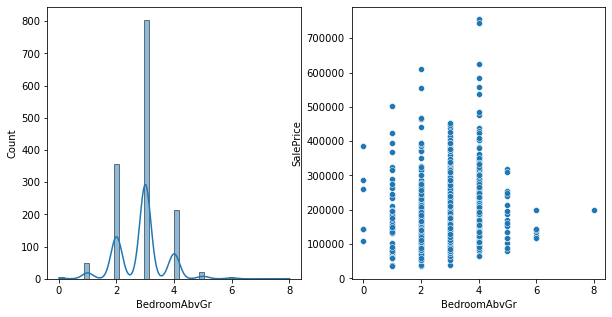

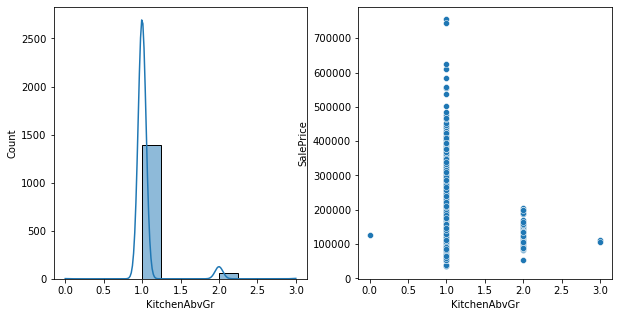

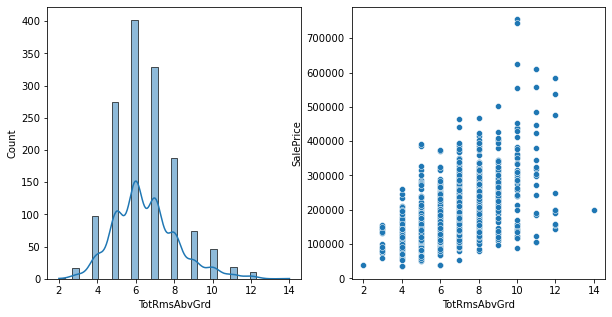

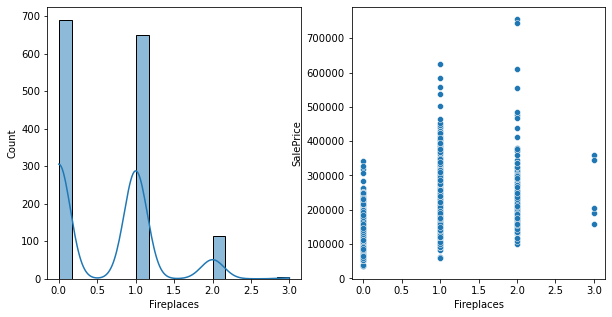

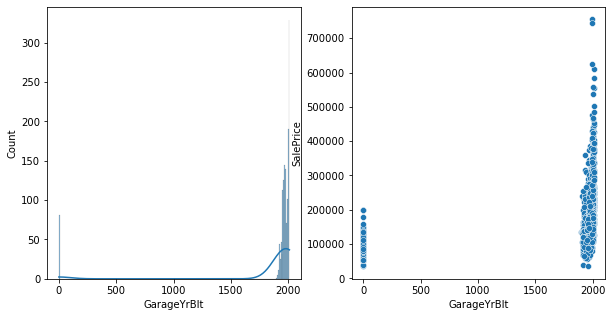

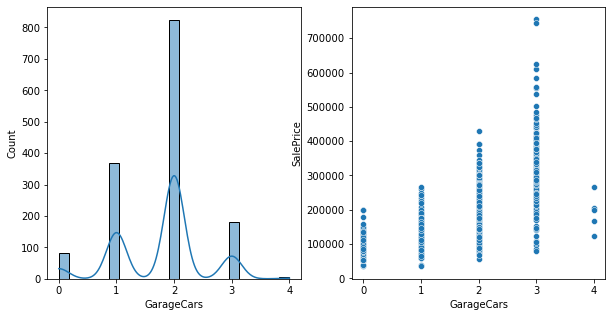

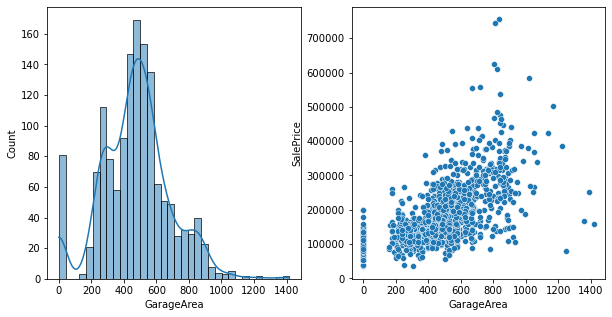

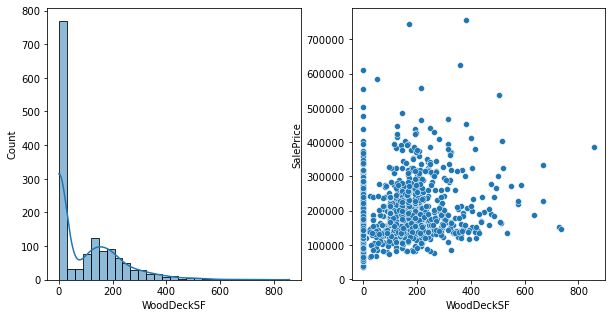

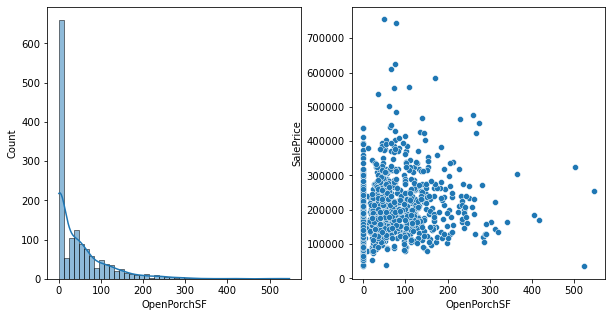

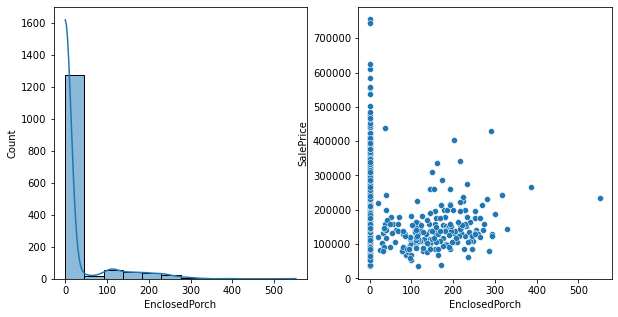

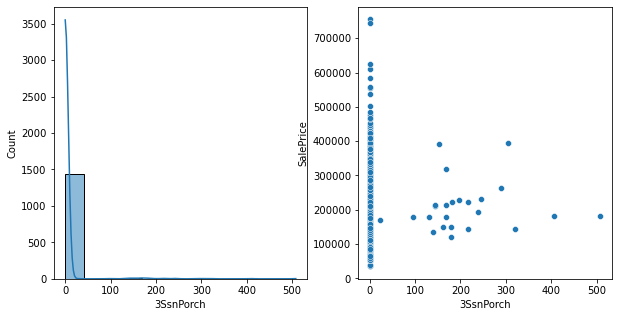

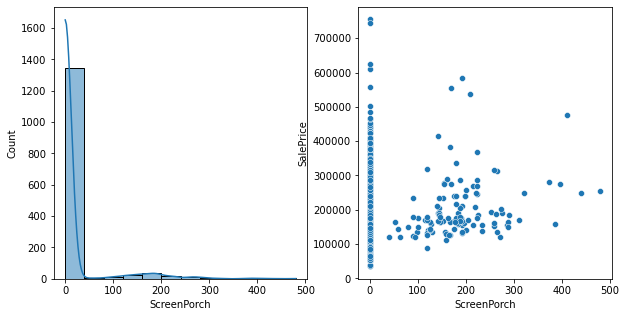

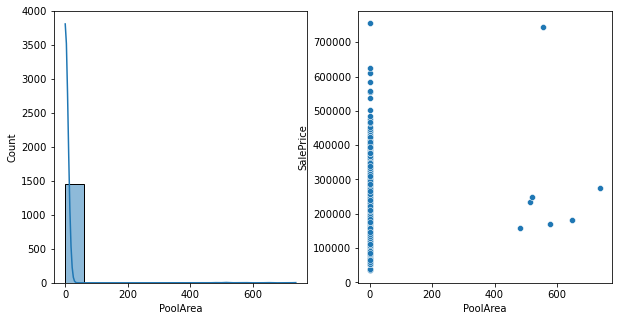

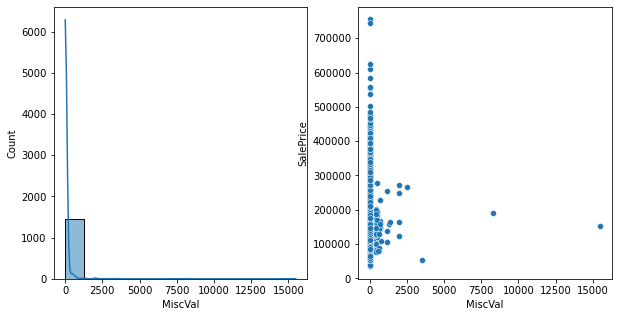

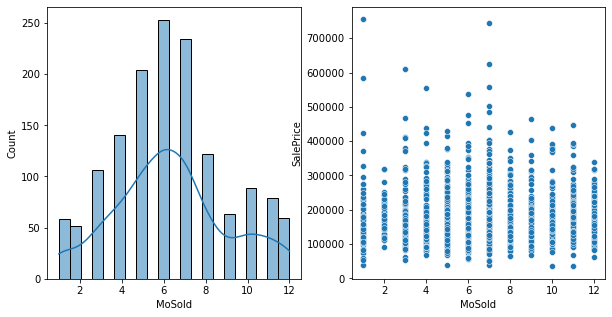

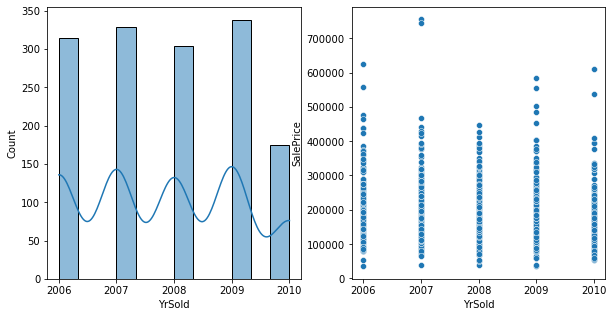

In [48]:
for i in numerical_columns:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.histplot(data = train , x = i ,kde = True)
    plt.subplot(1,2,2)
    sns.scatterplot(x=train[i] ,y = train["SalePrice"])
    plt.show()

In [49]:
categorical_cols = [col for col in train.columns if train[col].dtypes == "object"]
print("number of categorical columns is: ")
print(len(categorical_cols))


number of categorical columns is: 
43


In [50]:
# Ex > Gd > TA > Fa > Po
ord_cols_1 = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC', 'KitchenQual',
             'FireplaceQu','GarageQual','GarageCond']

mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,'missing':0}

for col in ord_cols_1:
    train[col] = train[col].map(mapping)

In [51]:
# Gd > Av > Mn > No > NA (missing)
ord_cols_2 = ['BsmtExposure']

mapping = {'Gd':4, 'Av': 3, 'Mn': 2, 'No': 1, 'missing': 0}

for col in ord_cols_2:
    train[col] = train[col].map(mapping) 

In [52]:
# GLQ > ALQ > BLQ > Rec > LwQ > Unf > NA (missing)
ord_cols_3 = ['BsmtFinType1', 'BsmtFinType2']

mapping = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'missing': 0}

for col in ord_cols_3:
    train[col] = train[col].map(mapping) 

In [53]:
# Functional
ord_cols_4 = ['Functional']

mapping = {'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3,
          'Sev': 2, 'Sal': 1}

for col in ord_cols_4:
    train[col] = train[col].map(mapping) 

In [54]:
# garageFinish
ord_cols_5 = ['GarageFinish']

mapping = {'Fin': 3, 'RFn': 2, 'Unf': 1, 'missing': 0}

for col in ord_cols_5:
    train[col] = train[col].map(mapping)  

In [55]:
# fence
mapping = {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'missing': 0}

train['Fence'] = train['Fence'].map(mapping)

# LotShape
mapping = {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1, 'missing': 4}
train['LotShape'] = train['LotShape'].map(mapping)

# LandContour
mapping = {'Lvl': 4, 'Bnk': 3, 'HLS':2,'Low':1,'missing': 4}
train['LandContour'] = train['LandContour'].map(mapping)

# Utilities
mapping = {'AllPub':4,'NoSewr':3,'NoSeWa':2,'ELO':1,'missing':4}
train['Utilities'] = train['Utilities'].map(mapping)
# LandSlope
mapping = {'Gtl':3,'Mod':2,'Sev':1}
train['LandSlope'] = train['LandSlope'].map(mapping)

# Heating
mapping = {'Wall':'other','OthW':'other','Floor':'other','Grav':'other'}
train['Heating'] = train['Heating'].map(mapping)

# Electrical
mapping = {'SBrkr':5,'FuseA':4,'FuseF':3,'FuseP':2,'Mix':1}
train['Electrical'] = train['Electrical'].map(mapping)

# PavedDrive
mapping = {'Y':3,'P':2,'N':1}

#MiscFeature
mapping = {'TenC':'high','Elev':'high'}

In [56]:
# binary categorical variables
train['CentralAir'] = train['CentralAir'].replace("N","0")
train['CentralAir'] = train['CentralAir'].replace("Y","1")
train['CentralAir'] = train['CentralAir'].astype(int)

In [57]:
# check again categorical cols
print("number of categorical cols before is: ")
print(len(categorical_cols))

categorical_cols = [col for col in train.columns if train[col].dtypes == "object"]
print("new number of categorical columns is: ")
print(len(categorical_cols))

number of categorical cols before is: 
43
new number of categorical columns is: 
22


In [58]:
# one hot encoder for remain categorical variables
cat_df = train.loc[:, categorical_cols]
cat_df = cat_df.drop(['Neighborhood','Condition2',
                     'Exterior1st','Exterior2nd',
                      'PoolQC','Alley'
                     ], axis=1)
cat_df = pd.get_dummies(cat_df)

print(cat_df.shape)
cat_df.head()

(1460, 90)


MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            0            1            0   
1                 0            0            0            1            0   
2                 0            0            0            1            0   
3                 0            0            0            1            0   
4                 0            0            0            1            0   

   Street_Grvl  Street_Pave  LotConfig_Corner  LotConfig_CulDSac  \
0            0            1                 0                  0   
1            0            1                 0                  0   
2            0            1                 0                  0   
3            0            1                 1                  0   
4            0            1                 0                  0   

   LotConfig_FR2  ...  SaleType_ConLw  SaleType_New  SaleType_Oth  \
0              0  ...               0             0             0   
1              1  ...               0             0             0   
2              0  ...               0             0             0   
3              0  ...               0             0             0   
4              1  ...               0             0             0   

   SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0            1                      0                      0   
1            1                      0                      0   
2            1                      0                      0   
3            1                      1                      0   
4            1                      0                      0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0                     0                     1   
1                     0                     0                     1   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     1   

   SaleCondition_Partial  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 90 columns]

In [59]:
# explore continuous variables
continuous_variables = [col for col in train.columns if train[col].dtype != "object"]
print("the number of continuous variables is: ")
print(len(continuous_variables))

the number of continuous variables is: 
57


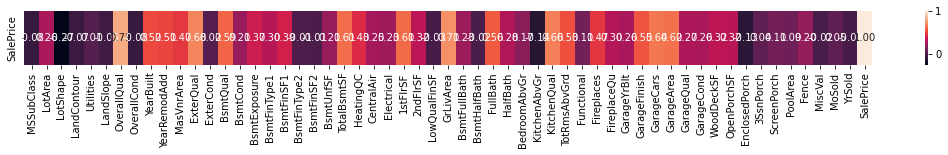

In [60]:
num = train.select_dtypes(exclude = 'object')
numcorr = num.corr()
f, ax = plt.subplots(figsize = (19,1)) # set figure size
sns.heatmap(numcorr.sort_values(by = 'SalePrice', ascending = False).head(1),annot = True, fmt = ".2f")
plt.show()

In [61]:
Num=numcorr['SalePrice'].sort_values(ascending=False).to_frame()
cm = sns.light_palette("orange", as_cmap=True)
s = Num.style.background_gradient(cmap=cm)
s

In [62]:
train = train.drop(['MoSold', '3SsnPorch','BsmtFinSF2','BsmtHalfBath','MiscVal',
              'LowQualFinSF','YrSold'], axis = 1)

Text(0.5, 1.0, 'MasVnrArea - SalePrice')

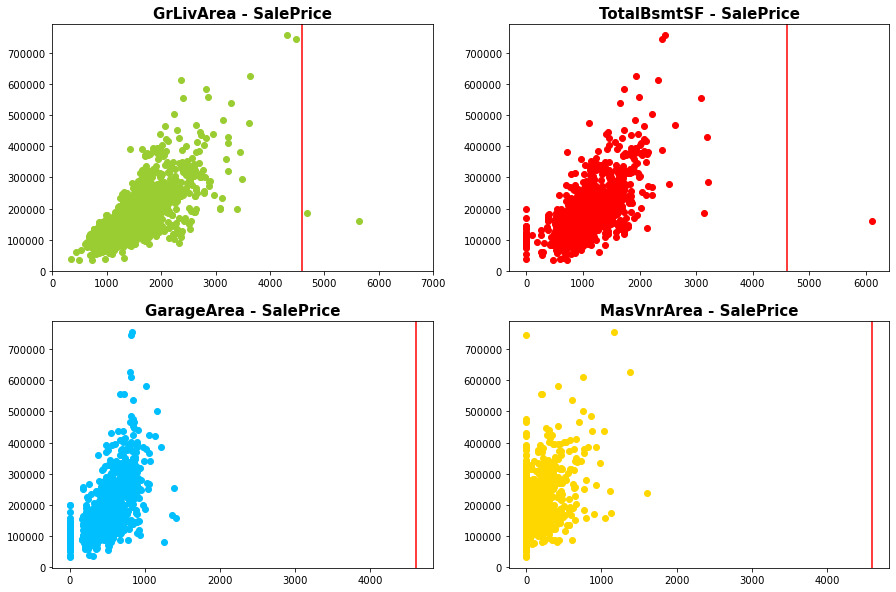

In [63]:
fig = plt.figure(figsize = (15,10))
ax1 = plt.subplot2grid((2,2),(0,0))
ax1.set_xlim([0,7000])
plt.scatter(x = train['GrLivArea'], y = train['SalePrice'], color = ('yellowgreen'))
plt.axvline(x = 4600, color = 'r', linestyle = '-')
plt.title('GrLivArea - SalePrice', fontsize = 15, weight = 'bold')

ax1 = plt.subplot2grid((2,2),(0,1))
plt.scatter(x = train['TotalBsmtSF'], y = train['SalePrice'], color = ('red'))
plt.axvline(x = 4600, color = 'r', linestyle = '-')
plt.title('TotalBsmtSF - SalePrice', fontsize = 15, weight = 'bold')

ax1 = plt.subplot2grid((2,2),(1,0))
plt.scatter(x = train['GarageArea'], y = train['SalePrice'], color = ('deepskyblue'))
plt.axvline(x = 4600, color = 'r', linestyle = '-')
plt.title('GarageArea - SalePrice', fontsize = 15, weight = 'bold')

ax1 = plt.subplot2grid((2,2),(1,1))
plt.scatter(x = train['MasVnrArea'], y = train['SalePrice'], color = ('gold'))
plt.axvline(x = 4600, color = 'r', linestyle = '-')
plt.title('MasVnrArea - SalePrice', fontsize = 15, weight = 'bold')

In [64]:
continuous_variables = [col for col in train.columns if train[col].dtype != "object"]

In [65]:
# specific replacement NA value
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(1980)

# mass replacement NA value by median
for col in continuous_variables:
    train[col] = train[col].fillna(0)

In [66]:
# combine df
train = train.drop(categorical_cols, axis = 1)
train = pd.concat([train, cat_df], axis = 1, join = 'inner')
print(train.shape)
train.head()

(1460, 140)


MSSubClass  LotArea  LotShape  LandContour  Utilities  LandSlope  \
0          60     8450         4            4          4          3   
1          20     9600         4            4          4          3   
2          60    11250         3            4          4          3   
3          70     9550         3            4          4          3   
4          60    14260         3            4          4          3   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd  ...  SaleType_ConLw  \
0            7            5       2003          2003  ...               0   
1            6            8       1976          1976  ...               0   
2            7            5       2001          2002  ...               0   
3            7            5       1915          1970  ...               0   
4            8            5       2000          2000  ...               0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0             0             0            1                      0   
1             0             0            1                      0   
2             0             0            1                      0   
3             0             0            1                      1   
4             0             0            1                      0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 140 columns]

### Feature Engineering

In [67]:
numcols=train._get_numeric_data().columns
train_num=train.loc[:,numcols]
cols=train_num.columns
tup=tuple(cols[1:])
#train_num
cols=train_num.columns

fig = make_subplots(
    rows=9, cols=4,shared_yaxes=True,subplot_titles=tup)
#    subplot_titles=("Plot 1", "Plot 2", "Plot 3", "Plot 4"))
k=1
j=1

for i in range(1,36):
#    print(k,j)
    fig.add_trace(
    go.Scatter(y=train_num['SalePrice'], x=train_num.iloc[:,i],mode='markers',name=cols[i]),
    row=k, col=j
    )
#    k=k%8
    j=j%4
    j=j+1
    
#    k=k+1
    if(i%4==0):
        k=k+1
      #  j=j+1

        
fig.update_layout(height=1800, width=800,
                  title_text="Dependency between SalePrice & Continous Variables",showlegend=False)
fig.show()

-OverallQual variable seems to be much more positively correlated with SalePrice than OverallCond
-Lot Area does not seem to have any correlation with SalePrice, SalePrice seems to vary wildly for same values of Lot Area
-GrLivArea,TotalBsmtSF & 1stFlrSF all look to have a positive linear correlation with SalePrice
-Houses built more recently sell for higher values, which is intuitive because newly built houses would be expected to fetch higher values than older houses
-SalePrice tends to generally increase with increase in TotRmsAbvGrd
Avg. SalePrice increases with increase in number of bathrooms
-SalePrice seems to increase with increase in GarageArea
-Majority of houses don't have a swimming pool
-The month and year of purchase does not seem to have any impact on SalePrice

First glance at this distribution gives out several ideas for Feature Engineering as well, wherein lot of individual variables don't have a high correlation with SalePrice, but when combined with other variables could generate meaningful features. Here are some examples -

-Combining the bathroom count variables for different floors & basement to derive total bathrooms
-Total area in a house combining area for different floors and basements
-Age of a house at sales using YrSold and YrBuilt values
-Combining area for different porch variables

In [68]:
train['year_qual'] = train['YearBuilt']*train['OverallQual']
train['year_r_qual'] = train['YearRemodAdd']*train['OverallQual']
train['qual_bsmt'] = train['OverallQual']*train['TotalBsmtSF']
train['livarea_qual'] = train['OverallQual']*train['GrLivArea']
train['qual_bath'] = train['OverallQual']*train['FullBath']
train['qual_ext'] = train['OverallQual']*train['ExterCond']
train['garage_qual'] = train['GarageArea']*train['GarageQual']

train['TotalArea'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF'] + train['GrLivArea'] + train['GarageArea']
train['Bathrooms'] = train['FullBath'] + train['HalfBath']*0.5
train['YearAverage'] = (train['YearRemodAdd'] + train['YearBuilt'])/2

In [70]:
# checking shape of train and test dataset
train.shape, test.shape

((1460, 150), (1459, 79))

In [72]:
# Selecting depending and indepent variable
x=train.drop('SalePrice',axis=1)
y=train['SalePrice']

# Now we will drop this 'Id' column from both of dataset as it doesn't possess much meaning
test.drop('Id',axis=1,inplace=True)

x.shape,test.shape

((1460, 149), (1459, 78))

In [73]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
ss=StandardScaler()

In [75]:
# Scaling input and test data using StandardScaler module
x=ss.fit_transform(x)

In [80]:
# Model Building
from sklearn.linear_model import LinearRegression,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,VotingRegressor

# Metrics to evaluate the model
from sklearn.metrics import mean_squared_error as mse

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [83]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
model_dt=DecisionTreeRegressor(criterion='mse')
model_dt.fit(X_train,y_train)


/Users/tushartinna/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.



DecisionTreeRegressor(criterion='mse')

In [84]:
model_dt.score(X_train,y_train)

0.9999960890402807

In [85]:
model_dt.score(X_test,y_test)


0.7676543106483891

In [86]:
# Random forest model
model_rf=RandomForestRegressor(n_estimators=500)
model_rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=500)

In [87]:
model_rf.score(X_train,y_train)

0.98143429101435

In [88]:
model_rf.score(X_test,y_test)

0.8475578849314471

In [89]:
# AdaAdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
model_adb=AdaBoostRegressor(n_estimators=250)
model_adb.fit(X_train,y_train)

AdaBoostRegressor(n_estimators=250)

In [90]:
model_adb.score(X_train,y_train)

0.8895285812363367

In [91]:
model_adb.score(X_test,y_test)

0.7984255311910045

In [92]:
#We have found that Random Forest is the best model, with best score.